In [851]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import locale
import math

# Import Bokeh modules for interactive plotting
import bokeh.io
from bokeh import mpl
import bokeh.mpl
#import bokeh.plotting

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 4, 
      'axes.labelsize': 20, 
      'axes.titlesize': 25, 
      'axes.facecolor': 'DFDFE5'}


# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

ImportError: cannot import name 'mpl'

In [780]:
from locale import atof

In [781]:
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

# ***all data entries are in millions of rupees***

In [782]:
df_2006 = pd.read_csv('GDP_2006_16.csv')

df_2006_t = df_2006.transpose()

df_2006_t.drop(df_2006_t.iloc[:, [0,13, 5, 1, 4, 8,9, 23, 28, 2,11, 16, 24, 41, 40, 39, 38, 37, 35,34,33,26,22, 21]], axis = 1, inplace = True)

# create index and columns for new dataframe
years_06 = list(range(2006, 2017))
cols_06 = df_2006_t.iloc[0]
df_2006_ti = df_2006_t.drop(['Table of contents'])

#create new dataframe 
df_06 = pd.DataFrame(df_2006_ti.values, index = years_06, columns = cols_06)

df_06 = df_06.rename(columns={"  Agriculture, forestry and fishing": "agriculture", 
                              "  Mining and quarrying": "mining", 
                              "  Manufacturing": "manufacturing", 
                              "  Electricity, gas, steam and  air conditioning supply": "power", 
                              "  Public administration and defence; compulsory social security                                                    ": "government", 
                              "  Gross Domestic Product at market  prices": "gdp_market_price",
                              "  Real estate activities": "services"
                             })


df_06


Table of contents,agriculture,mining,manufacturing,Textiles,power,Construction,Wholesale & retail trade; repair of motor vehicles and motorcycles,Transportation and storage,Accommodation and food service activities,Information and communication,Financial and insurance activities,services,"Professional, scientific and technical activities",government,Education,Human health and social work activities,"Arts, entertainment and recreation",gdp_market_price
2006,"9,521",832,"35,268","13,204","2,528","10,242","22,610","14,087","14,759","8,897","17,522","10,096","5,622","11,650","8,284","6,063","3,775","213,444"
2007,"9,464",880,"39,462","14,862","2,623","13,503","25,524","15,758","18,669","9,960","20,872","11,276","6,864","12,041","8,965","6,614","4,346","243,998"
2008,"9,714","1,038","44,817","14,165","3,947","16,748","28,842","15,650","19,167","11,049","23,908","12,789","8,717","13,780","10,283","7,618","5,435","274,316"
2009,"9,539","1,040","44,908","14,464","4,786","17,756","28,587","15,496","16,745","12,017","25,832","13,358","9,877","15,322","11,098","8,810","6,263","282,354"
2010,"9,438","1,173","45,180","13,967","4,729","18,544","30,897","16,285","18,510","13,013","26,853","14,199","10,841","16,159","11,706","9,529","6,843","299,171"
2011,"10,253","1,041","48,182","14,555","4,491","18,922","33,532","17,424","20,207","13,306","28,965","15,606","12,393","17,189","12,622","10,583","7,825","323,310"
2012,"10,494","1,000","50,537","14,721","4,092","19,034","36,807","17,797","21,249","13,478","31,262","16,665","13,882","17,984","13,413","11,698","8,826","343,942"
2013,"10,405",990,"55,021","15,875","4,491","17,680","39,705","18,763","19,697","13,938","32,799","17,784","15,407","21,283","15,428","13,768","9,903","366,325"
2014,"10,853",975,"56,458","16,919","5,288","16,414","42,469","20,006","21,512","14,540","35,293","18,922","16,845","22,784","16,290","15,247","10,912","386,229"
2015,"10,308",970,"57,629","17,838","5,320","15,862","44,861","21,200","24,092","15,016","36,994","19,587","18,021","23,705","17,097","16,426","11,603","403,536"


In [783]:
df_06a = df_06.drop(df_06.iloc[:, [3,5,6,7,10, 8,9,15,14,16, 12] ], axis = 1)
df_06a.head()

Table of contents,agriculture,mining,manufacturing,power,services,government,gdp_market_price
2006,"9,521",832,"35,268","2,528","10,096","11,650","213,444"
2007,"9,464",880,"39,462","2,623","11,276","12,041","243,998"
2008,"9,714","1,038","44,817","3,947","12,789","13,780","274,316"
2009,"9,539","1,040","44,908","4,786","13,358","15,322","282,354"
2010,"9,438","1,173","45,180","4,729","14,199","16,159","299,171"


In [784]:
df_06b = df_06.drop(df_06.iloc[:, [0,1,2,4,11,13,17] ], axis = 1)
df_06b.head()

Table of contents,Textiles,Construction,Wholesale & retail trade; repair of motor vehicles and motorcycles,Transportation and storage,Accommodation and food service activities,Information and communication,Financial and insurance activities,"Professional, scientific and technical activities",Education,Human health and social work activities,"Arts, entertainment and recreation"
2006,"13,204","10,242","22,610","14,087","14,759","8,897","17,522","5,622","8,284","6,063","3,775"
2007,"14,862","13,503","25,524","15,758","18,669","9,960","20,872","6,864","8,965","6,614","4,346"
2008,"14,165","16,748","28,842","15,650","19,167","11,049","23,908","8,717","10,283","7,618","5,435"
2009,"14,464","17,756","28,587","15,496","16,745","12,017","25,832","9,877","11,098","8,810","6,263"
2010,"13,967","18,544","30,897","16,285","18,510","13,013","26,853","10,841","11,706","9,529","6,843"


In [785]:
df_99 = pd.read_csv('GDP_99_10 .csv', thousands=',')
df_99 = df_99.dropna(axis=0)
df_99 = df_99.rename(columns={"Table 3 - Gross Domestic Product by industry group at current basic prices, 1999 - 2010": "Table"})
df_99 = df_99.set_index('Table')
df_99 = df_99.rename(columns={"Unnamed: 1": "1999", "Unnamed: 2": "2000", "Unnamed: 3": "2001", "Unnamed: 4": "2002", "Unnamed: 5": "2003", "Unnamed: 6": "2004", "Unnamed: 7": "2005", "Unnamed: 8": "2006", "Unnamed: 9": "2007", "Unnamed: 10": "2008", "Unnamed: 11": "2009", "Unnamed: 12": "2010"})

df_99_t = df_99.transpose()

col_list2 = pd.Series(['agriculture', 'hi', 'hi','mining', 'manufacturing', 'hi','hi','hi','hi','power','hi','hi', 'hi','hi','hi','hi','hi','hi','hi','hi','hi','hi','hi','government', 'hi', 'hi',  'services','hi','hi', 'gdp_market_price','hi'])
df_99_t.columns = col_list2

df_99_t.drop(columns = ['hi'], axis = 1, inplace = True)
df_99_t = df_99_t.drop(['2010', '2009', '2008', '2007', '2006'])

df_99_t

,agriculture,mining,manufacturing,power,government,services,gdp_market_price
1999,5466,159,22043,1368,6095,3127,109400
2000,6984,163,24171,1760,6693,3484,122410
2001,8262,156,26934,2578,7132,3776,134392
2002,7530,99,27654,2947,7764,4250,145055
2003,8403,88,29260,3368,8991,4771,162291
2004,9545,90,31725,3505,10098,5378,180908
2005,9527,88,32331,3228,10908,6035,191393


In [786]:
df_76 = pd.read_csv('GDP_76_98.csv', thousands=',')
df_76 = df_76.dropna(axis=0)
df_76 = df_76.rename(columns={"GROSS DOMESTIC PRODUCT BY INDUSTRY GROUP AT CURRENT PRICES (RS MN),1976 - 1998": "Table"})
df_76 = df_76.set_index('Table')
df_76 = df_76.rename(columns={"Unnamed: 1": "1976", "Unnamed: 2": "1977", "Unnamed: 3": "1978", "Unnamed: 4": "1979", "Unnamed: 5": "1980", "Unnamed: 6": "1981", "Unnamed: 7": "1982", "Unnamed: 8": "1983", "Unnamed: 9": "1984", "Unnamed: 10": "1985", "Unnamed: 11": "1986", "Unnamed: 12": "1987", "Unnamed: 13": "1988", "Unnamed: 14": "1989", "Unnamed: 15": "1990", "Unnamed: 16": "1991", "Unnamed: 17": "1992", "Unnamed: 18": "1993", "Unnamed: 19": "1994", "Unnamed: 20": "1995", "Unnamed: 21": "1996", "Unnamed: 22": "1997", "Unnamed: 23": "1998"})
df_76_t = df_76.drop(labels = ['INDUSTRY GROUP'])
df_76_t = df_76_t.transpose()

df_76_t.columns
col_list3 = pd.Series(['agriculture', 'hi', 'hi','mining', 'manufacturing', 'power','hi','hi', 'hi','government', 'hi', 'hi', 'hi', 'hi','hi','hi','hi','hi','hi', 'services', 'gdp_market_price','hi', 'hi' ])
df_76_t.columns = col_list3

df_76_t.drop(columns = ['hi'], axis = 1, inplace = True)
df_76_t.head()


,agriculture,mining,manufacturing,power,government,services,gdp_market_price
1976,938.0,7.0,631.0,228.0,333.0,197.0,4165.0
1977,939.0,9.0,699.0,209.0,406.0,241.0,4776.0
1978,977.0,11.0,801.0,218.0,506.0,290.0,5494.0
1979,1224.0,12.0,972.0,276.0,552.0,349.0,6540.0
1980,914.0,15.0,1127.0,178.0,561.0,415.0,7389.0


In [787]:

df_48 = pd.read_csv('GDP_48_75.csv', thousands=',')
df_48 = df_48.dropna(axis=0)
df_48 = df_48.rename(columns={"Table 1 - Gross Domestic Product by Industrial Origin at current factor cost, 1948 - 1975": "Table"})
df_48 = df_48.set_index('Table')
df_48 = df_48.rename(columns={"Unnamed: 1": "1948", "Unnamed: 2": "1949", "Unnamed: 3": "1950", "Unnamed: 4": "1951", "Unnamed: 5": "1952", "Unnamed: 6": "1953", "Unnamed: 7": "1954", "Unnamed: 8": "1955", "Unnamed: 9": "1956", "Unnamed: 10": "1957", "Unnamed: 11": "1958", "Unnamed: 12": "1959", "Unnamed: 13": "1960", "Unnamed: 14": "1961", "Unnamed: 15": "1962", "Unnamed: 16": "1963", "Unnamed: 17": "1964", "Unnamed: 18": "1965", "Unnamed: 19": "1966", "Unnamed: 20": "1967", "Unnamed: 21": "1968", "Unnamed: 22": "1969", "Unnamed: 23": "1970", "Unnamed: 24": "1971", "Unnamed: 25": "1972", "Unnamed: 26": "1973", "Unnamed: 27": "1974", "Unnamed: 28": "1975"})
df_48_t = df_48.transpose()
df_48_t.head()

df_48_t.drop(df_48_t.iloc[:, [3, 5, 6, 7,8,11,12,14,15]], axis = 1, inplace = True)

df_48 = df_48_t.rename(columns={'Agriculture, forestry, hunting and fishing ': "agriculture", 
                              'Mining and quarrying': "mining", 
                              'Manufacturing': "manufacturing", 
                              'Electricity, gas, water and sanitary services': "power", 
                              'Public administration and defence': "government", 
                              'Gross Domestic Product at market prices': "gdp_market_price",
                              'Services': "services"
                             })
df_48.head()

Table,agriculture,mining,manufacturing,power,government,services,gdp_market_price
1948,...,...,...,...,...,...,...
1949,...,...,...,...,...,...,...
1950,129,0,95,5,9,34,445
1951,145,0,109,7,11,38,509
1952,156,0,122,10,14,44,572


In [812]:
df_GDP = pd.concat([df_48, df_76_t, df_99_t, df_06a], axis = 0, sort = False)

df_GDP = df_GDP.drop(['1948', '1949', '1950', '1951', '1952'], axis = 0)
df_GDP = df_GDP[~df_GDP.index.duplicated(keep='first')]
df_GDP.index.rename('Years', inplace = True)
df_GDP

,agriculture,mining,manufacturing,power,government,services,gdp_market_price
Years,,,,,,,
1953,177,1,108,7,17,43,594
1954,170,1,106,7,18,44,590
1955,179,1,109,8,20,46,618
1956,200,1,120,8,21,50,661
1957,200,1,115,8,22,55,683
1958,188,1,102,9,25,61,678
1959,200,1,114,12,28,65,723
1960,128,1,75,12,28,70,653
1961,182,1,111,14,30,75,772


In [816]:
#removing the commas from the database

def my_containsAny(str, set):
    for c in set:
        if c in str: return 1;
    return 0

for column in df_GDP:
    index = -1
    for i in df_GDP[column]:
        index = index +  1
        if type(i) == str:
            #print("this is a string: " + i)
            if my_containsAny(i, ',') == 1:
                #print("replacing the commas in this string: ", i)
                i = i.replace(',', '')
                #print("this no longer has commas: " + i)
                i = float(i)
                #print("this was a string but now it is a float: %f, " % (i) )
                df_GDP[column][index] = i
            else: 
                i = float(i)
                df_GDP[column][index] = i
                #print("this was a string  but now it is a float: %f" % (i) 
                
# now graphs can be made
df_GDP.head()

,agriculture,mining,manufacturing,power,government,services,gdp_market_price
Years,,,,,,,
1953,177,1,108,7,17,43,594
1954,170,1,106,7,18,44,590
1955,179,1,109,8,20,46,618
1956,200,1,120,8,21,50,661
1957,200,1,115,8,22,55,683


In [846]:
df_GDP2 = pd.DataFrame(df_GDP.drop('gdp_market_price', axis = 1), index = df_GDP.index)
df_GDP2.head()

,agriculture,mining,manufacturing,power,government,services
Years,,,,,,
1953,177,1,108,7,17,43
1954,170,1,106,7,18,44
1955,179,1,109,8,20,46
1956,200,1,120,8,21,50
1957,200,1,115,8,22,55


In [806]:
df_GDP.index.astype(str)

Index(['1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', name='Years')

In [790]:
# year on year percent change in GDP
df_GDP_per = pd.DataFrame(index = df_GDP.index)

for col_name in list(df_GDP.columns):
    perc_list = []
    j = -1
    for i in df_GDP[col_name]:
        #print(j)
        new_value = (i - df_GDP[col_name].iloc[j]) / df_GDP[col_name].iloc[j] * 100.0
        perc_list.append(new_value)
        j = j + 1
    df_GDP_per[col_name] = perc_list

df_GDP_per.head()

,agriculture,mining,manufacturing,power,government,services,gdp_market_price
Years,,,,,,,
1953,-98.372114,-99.901865,-99.820273,-99.880464,-99.935691,-99.791999,-99.862444
1954,-3.954802,0.000000,-1.851852,0.000000,5.882353,2.325581,-0.673401
1955,5.294118,0.000000,2.830189,14.285714,11.111111,4.545455,4.745763
1956,11.731844,0.000000,10.091743,0.000000,5.000000,8.695652,6.957929
1957,0.000000,0.000000,-4.166667,0.000000,4.761905,10.000000,3.328290


In [855]:
# saving dataframes as pickle files
df_GDP.to_pickle('GDP.pkl')
df_GDP_per.to_pickle('GDP_per.pkl')
df_GDP2.to_pickle('GDP2.pkl')

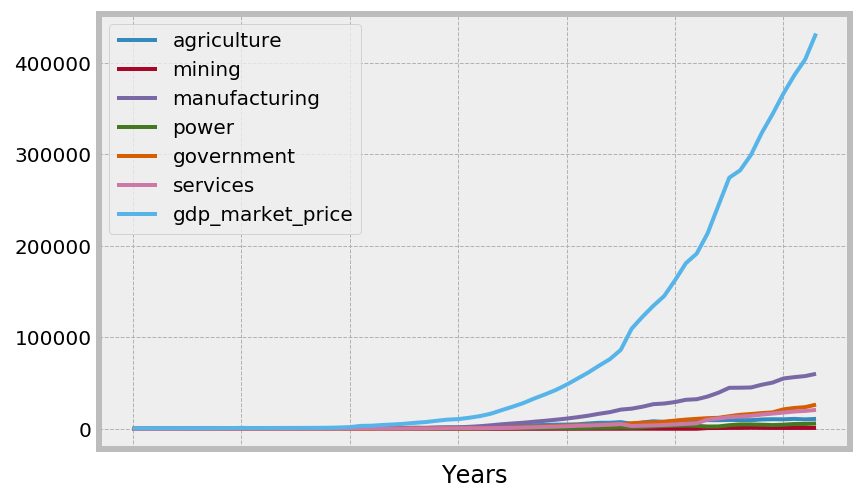

In [792]:
df_GDP.plot()

## Gross Domestic Product, at the market price, over time 
Figures shown in millions of rupees

In [794]:
type(df_GDP.index.astype(int))

pandas.core.indexes.numeric.Int64Index

<function matplotlib.pyplot.show(*args, **kw)>

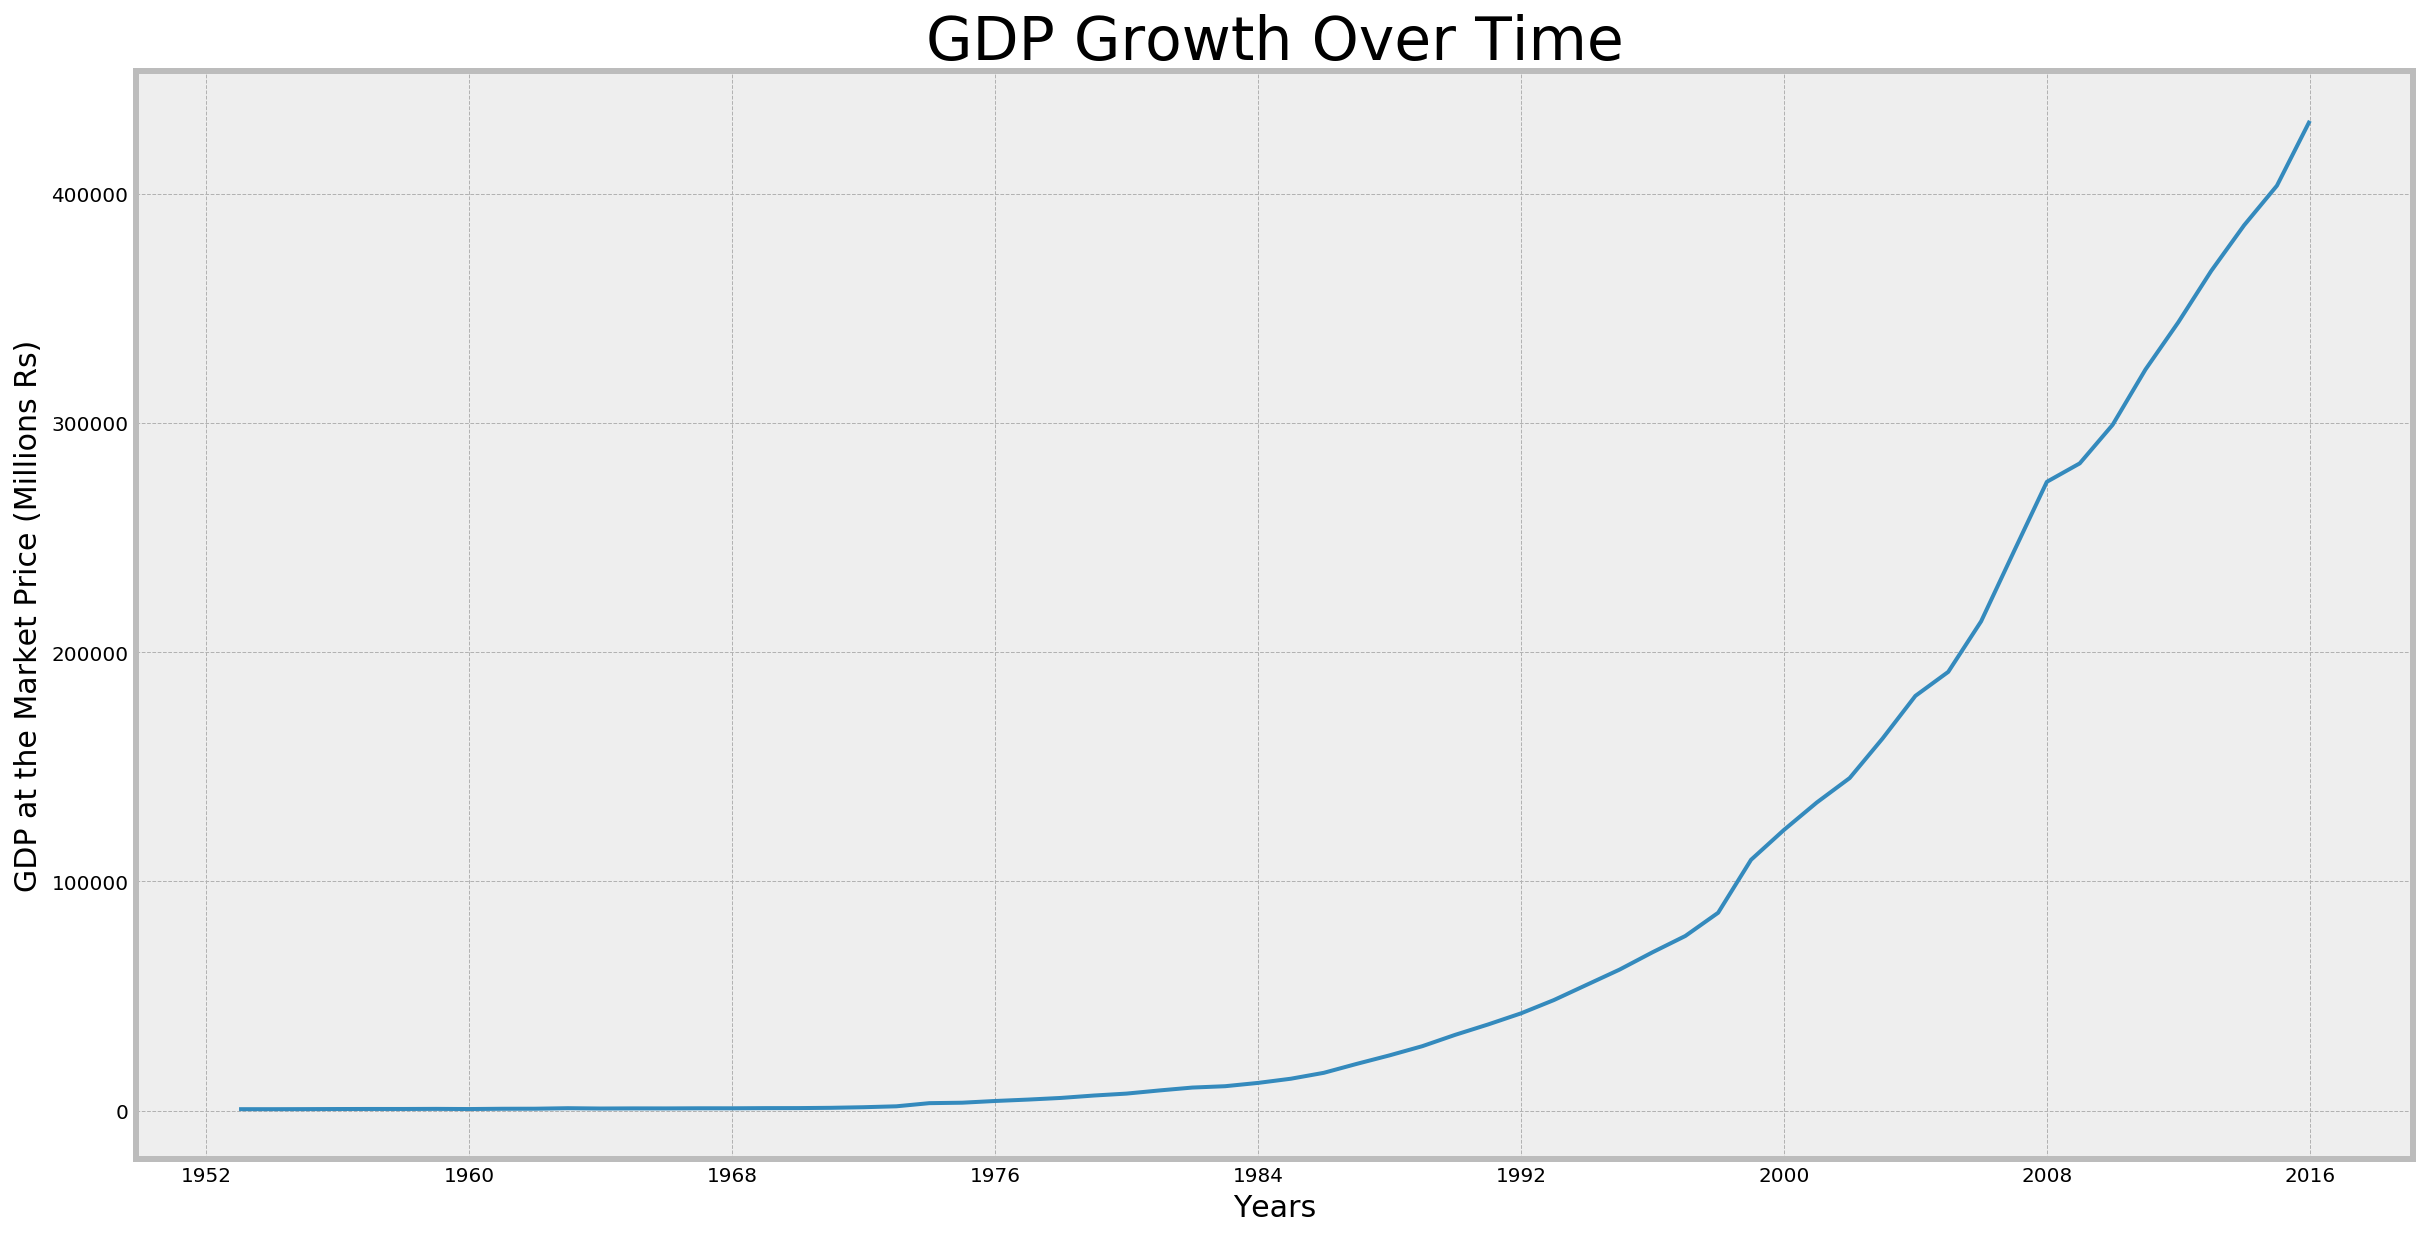

In [795]:
x = df_GDP.index.astype(int)
y = df_GDP['gdp_market_price']


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('GDP at the Market Price (Millions Rs)', fontsize=15)
plt.title('GDP Growth Over Time', fontsize=30)
plt.plot(linewidth = 10)

plt.plot(x,y)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

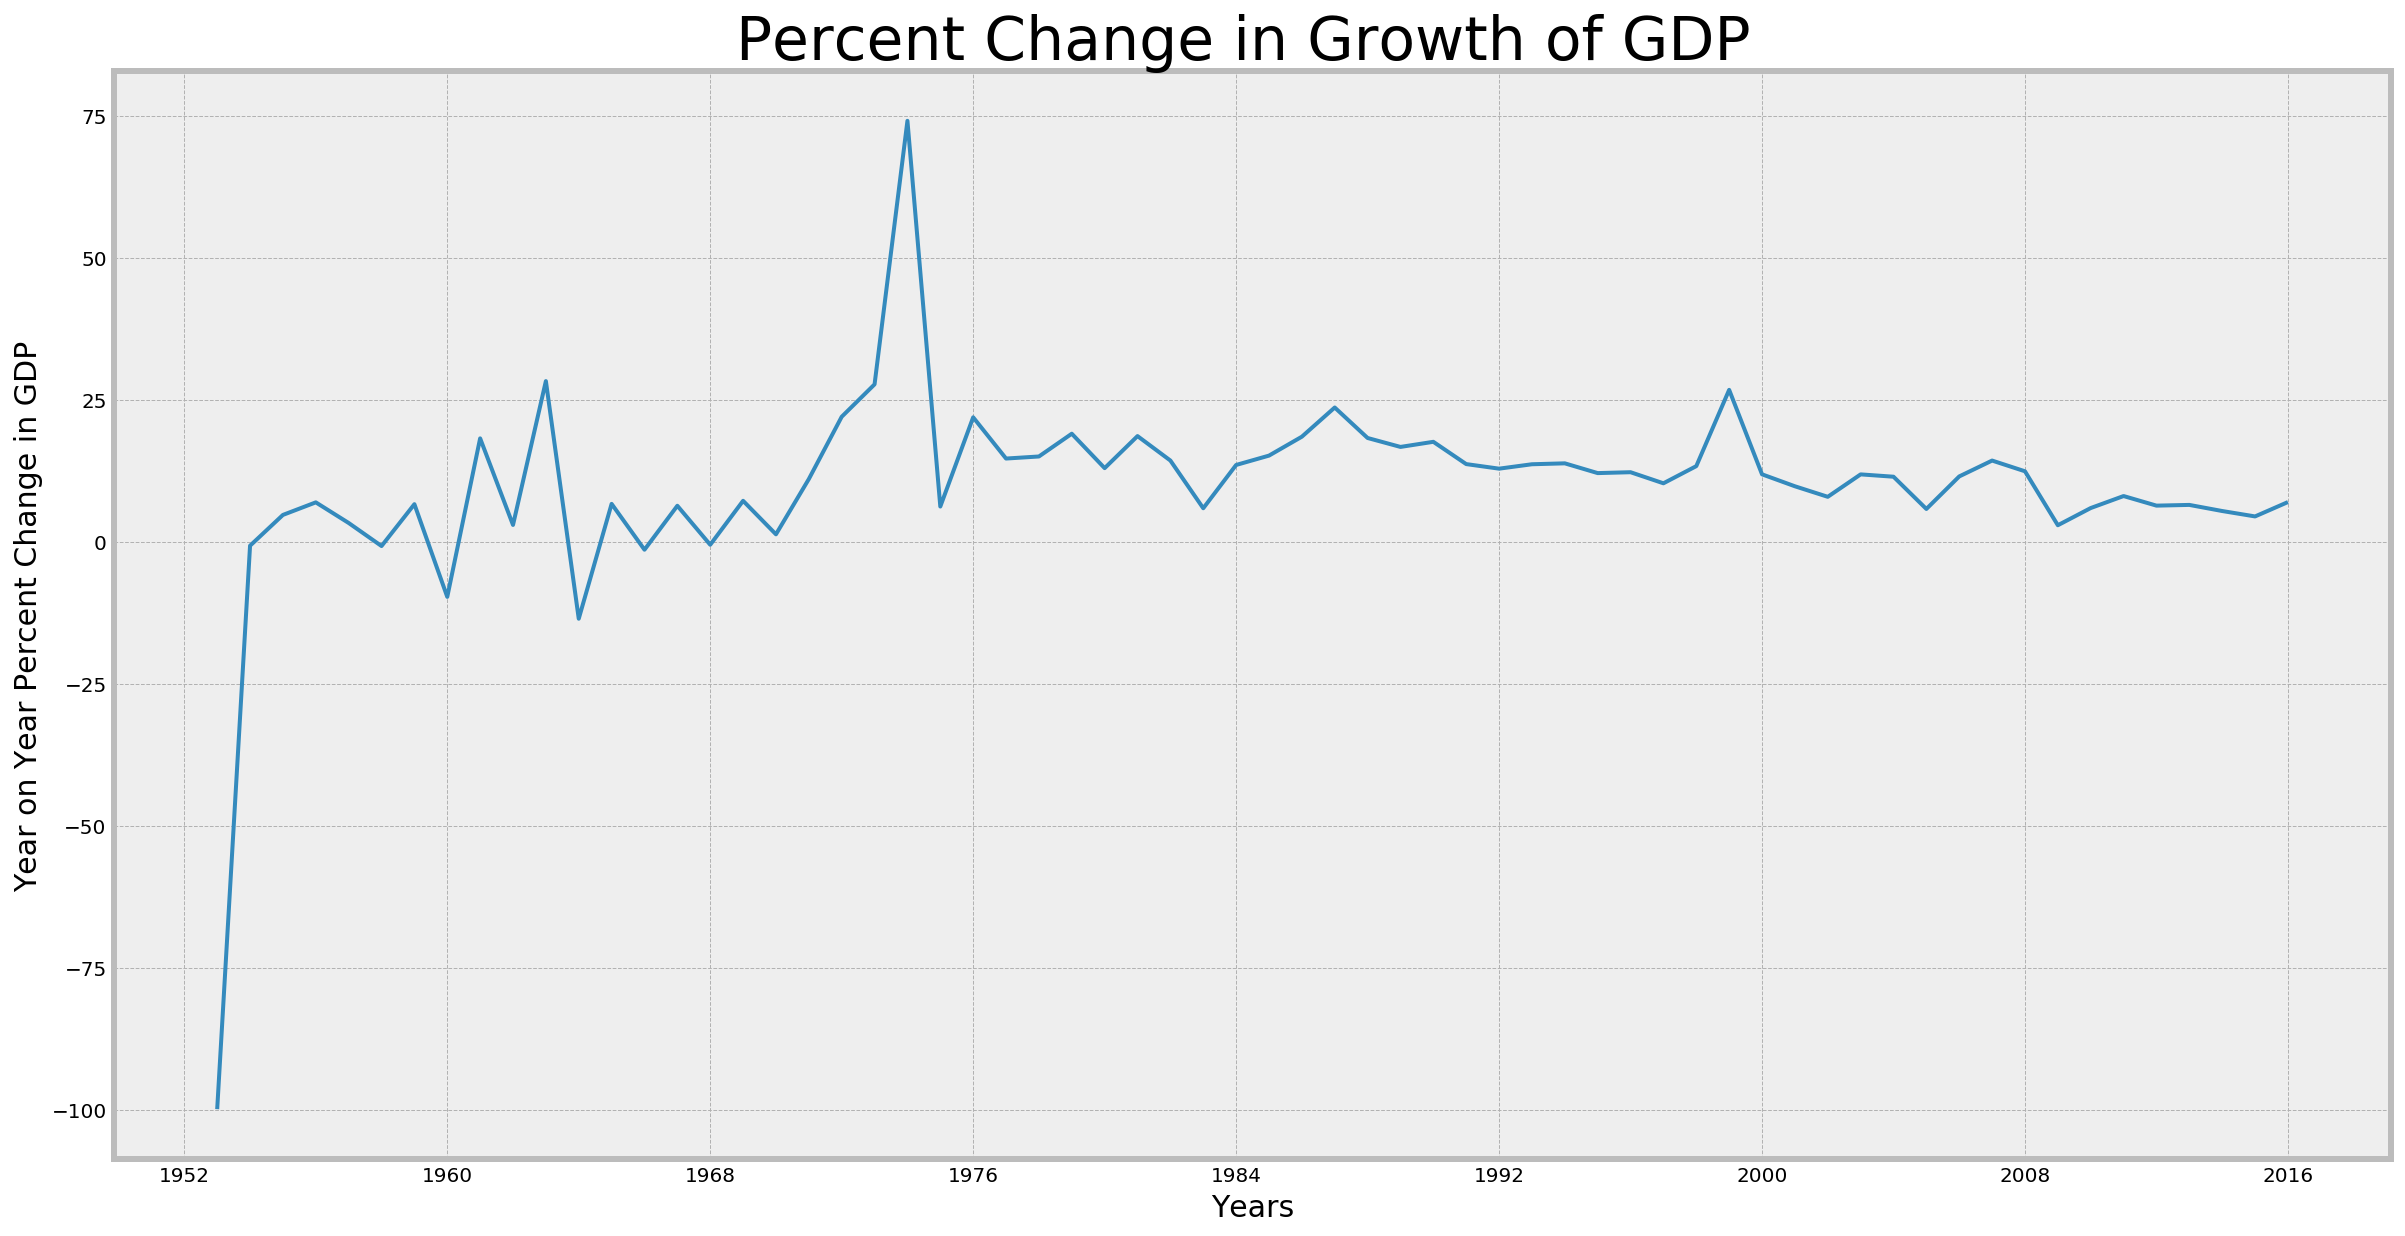

In [852]:
xa = df_GDP_per.index.astype(int)
ya = df_GDP_per['gdp_market_price']


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('Year on Year Percent Change in GDP', fontsize=15)
plt.title('Percent Change in Growth of GDP ', fontsize=30)

plt.plot(linewidth = 10)

plt.plot(xa,ya)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

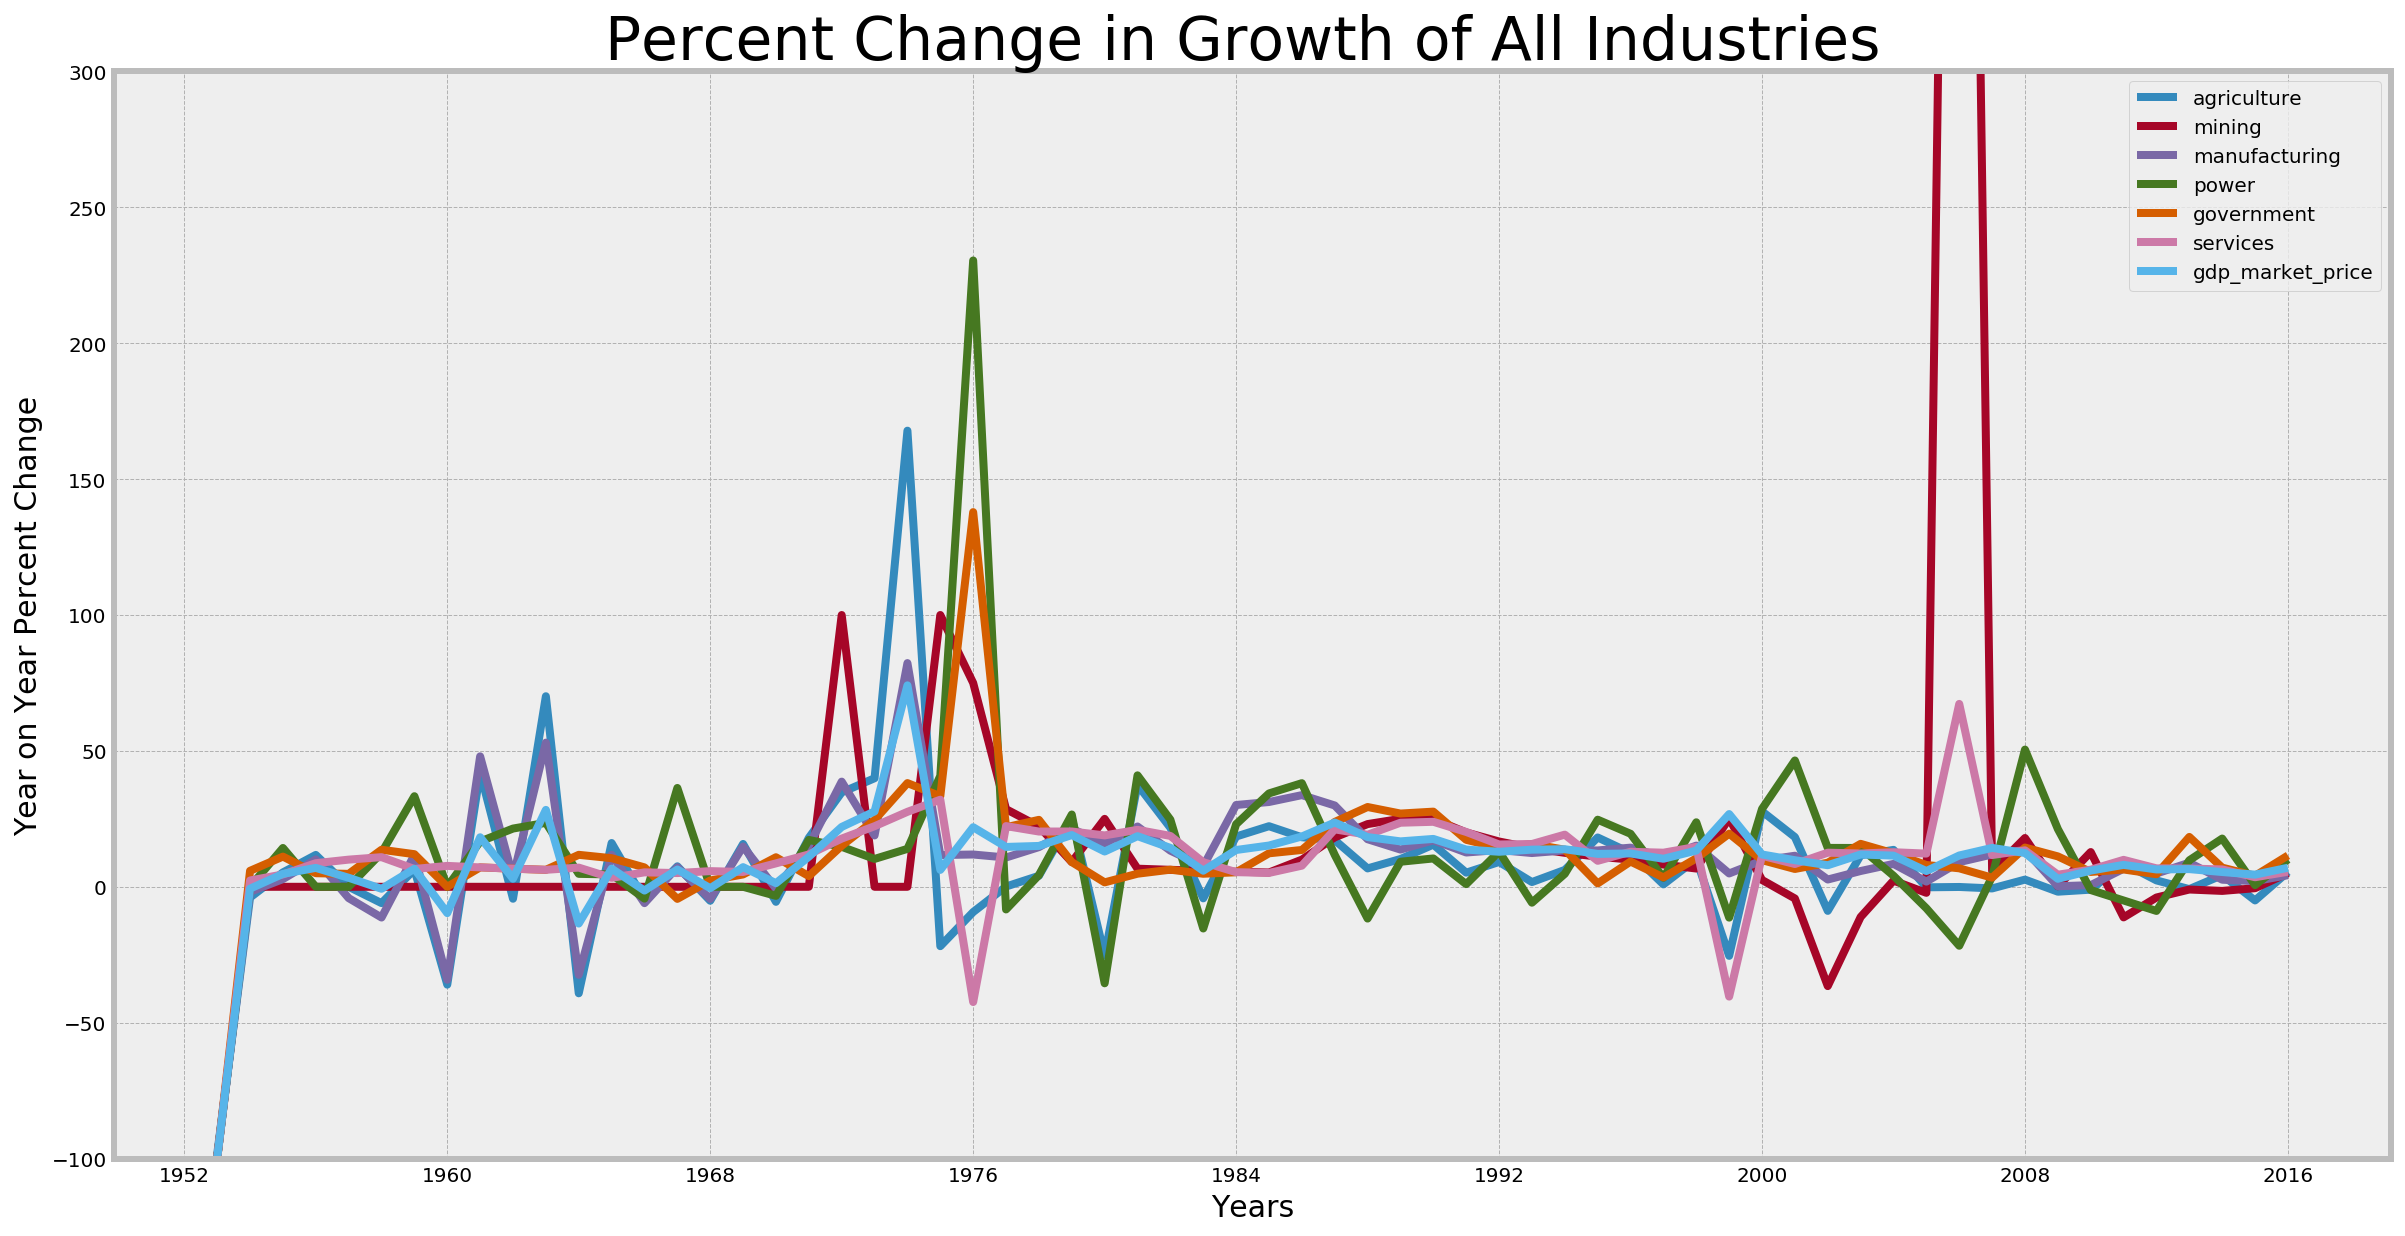

In [797]:
xa = df_GDP_per.index.astype(int)
ya = df_GDP_per


fig = plt.figure(figsize=(40,10), linewidth = 10)
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=10)


plt.xlabel('Years', fontsize=15)
plt.ylabel('Year on Year Percent Change', fontsize=15)
plt.title('Percent Change in Growth of All Industries ', fontsize=30)

plt.plot(linewidth = 15)
plt.ylim(-100,300)

plt.plot(xa,ya, linewidth = 4)
plt.legend(df_GDP_per.columns)
plt.show

In [798]:
ya = df_GDP_per['gdp_market_price']

## Growth of industries over time

<function matplotlib.pyplot.show(*args, **kw)>

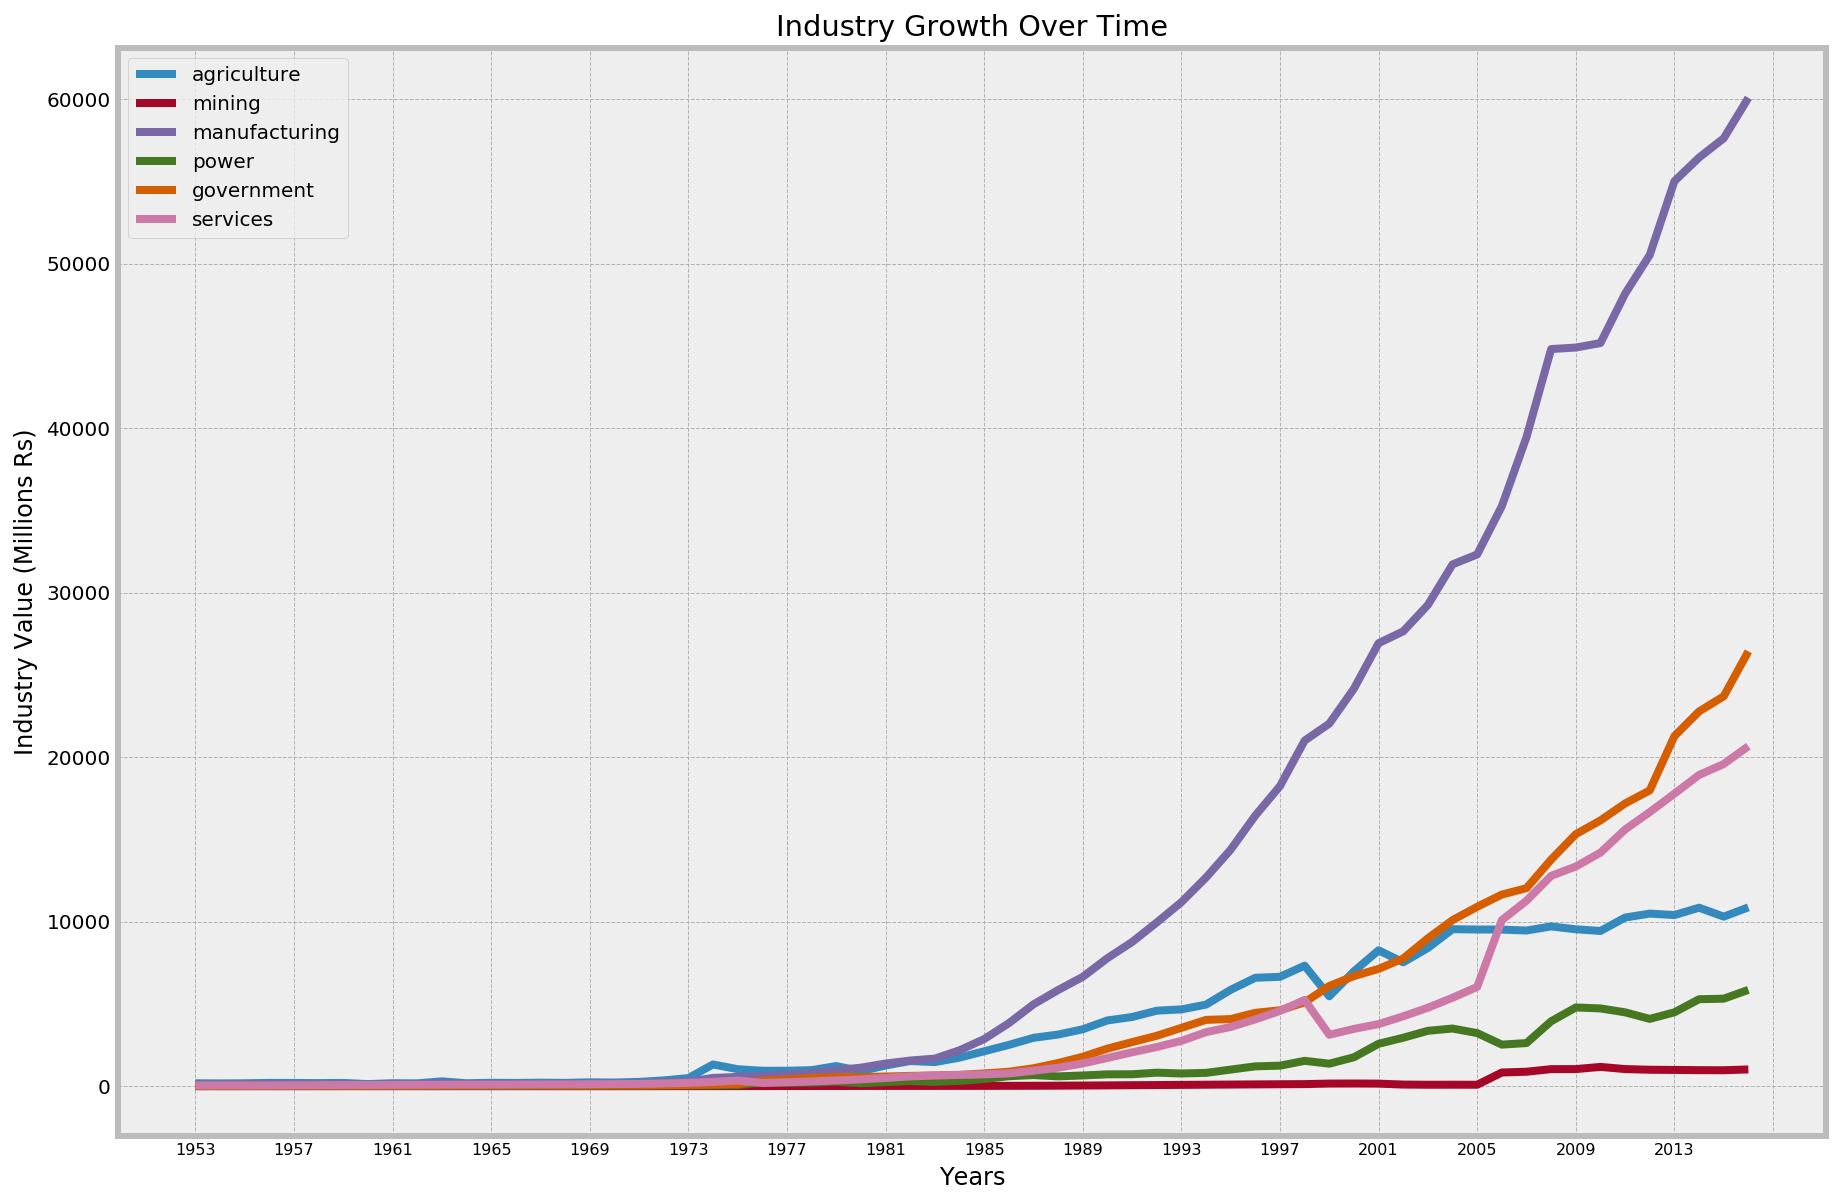

In [823]:
x = df_GDP2.index.astype(str)
y = df_GDP2

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(121)

# number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

ax.tick_params(axis='x', labelsize=8)
# where is the legend????
plt.plot(x,y, linewidth = 4)

plt.xlabel('Years')
plt.ylabel('Industry Value (Millions Rs)')
plt.title('Industry Growth Over Time')
plt.legend(df_GDP2.columns)

plt.show

In [ ]:
df_GDP.drop(columns="gdp_market_price").plot(figsize=(25,10), kind = 'bar')

## Change in percentage of GDP made up by each industry over time

<function matplotlib.pyplot.show(*args, **kw)>

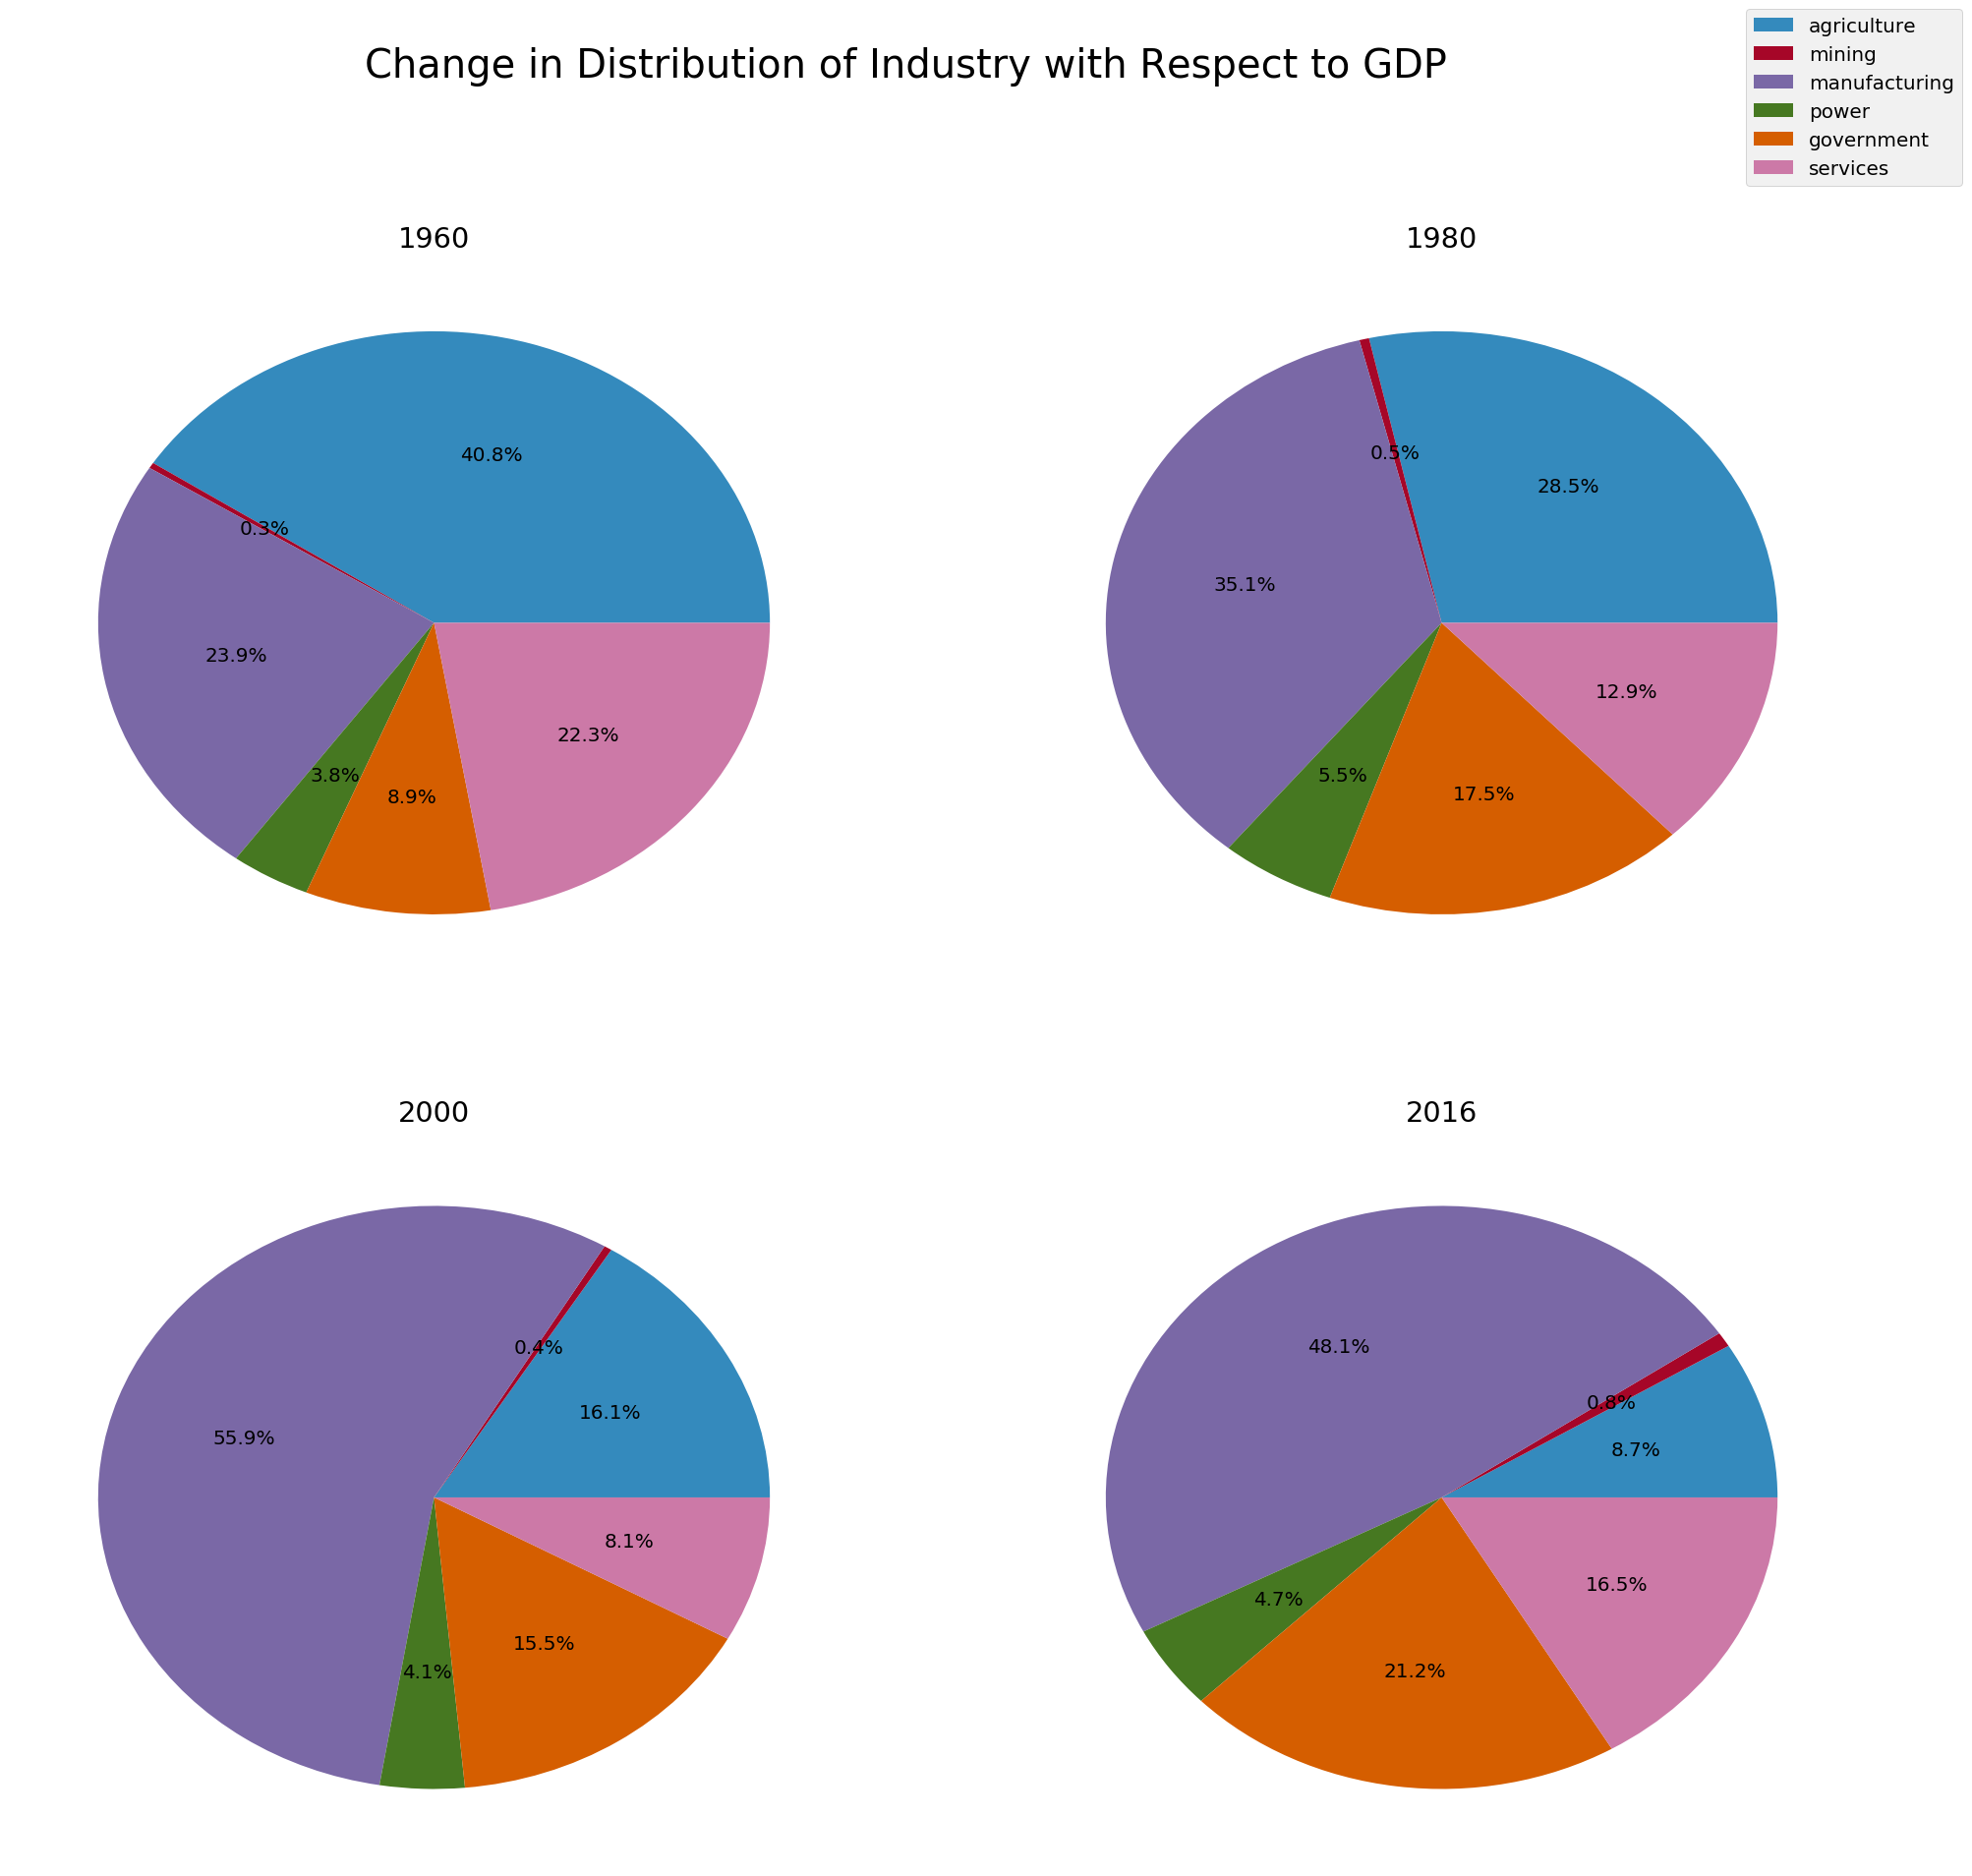

In [845]:
x50 = df_GDP2.loc['1960']
x70 = df_GDP2.loc['1980']
x90 = df_GDP2.loc['2000']
x2016 = df_GDP2.loc[2016]

fig, axes = plt.subplots(2,2,  figsize=(15,15))



axes[0,0].pie(x50, autopct='%.1f%%', pctdistance = 0.6)
axes[0,0].set_title("1960")
axes[0,1].pie(x70, autopct='%.1f%%', pctdistance = 0.6)
axes[0,1].set_title("1980")
axes[1,0].pie(x90, autopct='%.1f%%', pctdistance = 0.6)
axes[1,0].set_title("2000")
axes[1,1].pie(x2016, autopct='%.1f%%', pctdistance = 0.6)
axes[1,1].set_title("2016")

fig.suptitle("Change in Distribution of Industry with Respect to GDP", fontsize = 20)
plt.figlegend(list(df_GDP2.columns))


plt.show